In [6]:
import matplotlib.pyplot as plt
import os
from shutil import copyfile
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
import pyathena as pa
#from scipy.stats import lognorm
import cPickle
from mpl_toolkits import axes_grid1

from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle
import time


In [7]:
labell = (r'No ICM','ICM00','ICM0','ICM1','ICM2','ICM3','ICM4') # 'NonICM',r'No ICM',
labelll = ('Total','Cold&Warm','Hot')
k = 3
cold = cPickle.load(open('F:/yeongu/surf_ism_cold_%s.pkl' % labell[k],'rb')) # < 20000
ion = cPickle.load(open('F:/yeongu/surf_ism_ion_%s.pkl' % labell[k],'rb')) # 20000 ~ 500000
hot = cPickle.load(open('F:/yeongu/surf_ism_hot_%s.pkl' % labell[k],'rb')) # > 500000K 

label = labell[k]
print cold.shape # tiem / ([hist0,hist0_c,hist0_h,histh,histh_c,histh_h,hist1,hist1_c,hist1_h,hist2,hist2_c,hist2_h,hist3,hist3_c,hist3_h]) # -1000,1000,5


(250L, 896L, 399L)


In [25]:
up = np.percentile(np.mean(cold[::,i-3:i+3],axis=1),84,axis=0)
down = np.percentile(np.mean(cold[::,i-3:i+3],axis=1),16,axis=0)

(250L, 399L)


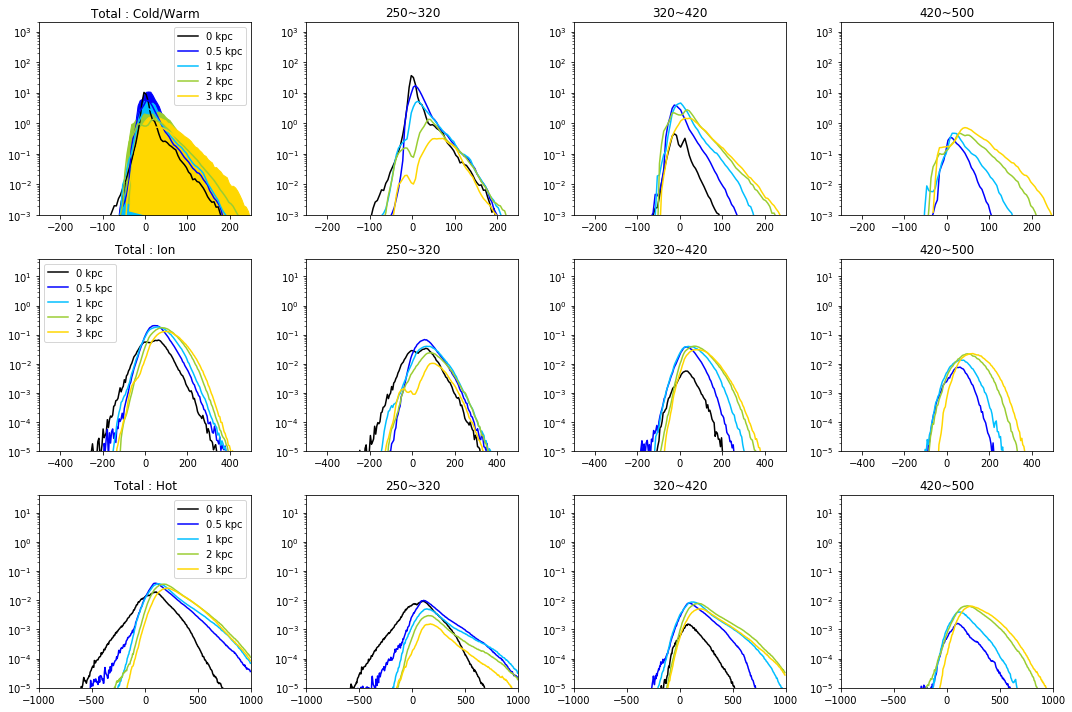

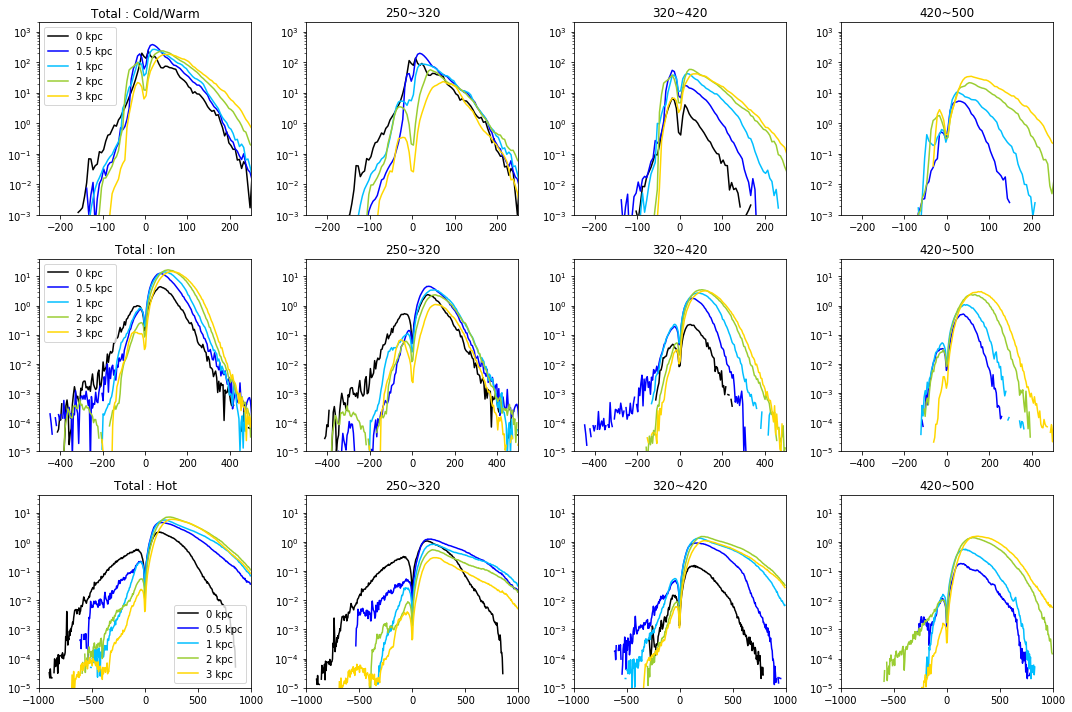

In [23]:
######### Velocity weight ###########

ct = np.mean(cold,axis=0)
c1 = np.mean(cold[0:70],axis=0)
c2 = np.mean(cold[70:170],axis=0)
c3 = np.mean(cold[170:-1],axis=0)
it = np.mean(ion,axis=0)
i1 = np.mean(ion[0:70],axis=0)
i2 = np.mean(ion[70:170],axis=0)
i3 = np.mean(ion[170:-1],axis=0)
ht = np.mean(hot,axis=0)
h1 = np.mean(hot[0:70],axis=0)
h2 = np.mean(hot[70:170],axis=0)
h3 = np.mean(hot[170:-1],axis=0)

xx = np.arange(-997.5,997.5,5)

plt.figure(figsize=(15,10))

C = ['k','blue','deepskyblue','yellowgreen','gold']
alpha = [1,1,1,1,1]
labell = ['0 kpc','0.5 kpc','1 kpc','2 kpc','3 kpc']
j = 0
for i in (448,510,573,698,823): # 0,0.5,1,2,3 kpc

    if k==0:
        coldt = abs((np.sum(ct[i-3:i+3],axis=0)+np.sum(ct[896-i-3:896-i+3],axis=0)[::-1])*xx)
        cold1 = abs((np.mean(c1[i-3:i+3],axis=0)+np.mean(c1[896-i-3:896-i+3],axis=0)[::-1])*xx)
        cold2 = abs((np.mean(c2[i-3:i+3],axis=0)+np.mean(c2[896-i-3:896-i+3],axis=0)[::-1])*xx)
        cold3 = abs((np.mean(c3[i-3:i+3],axis=0)+np.mean(c3[896-i-3:896-i+3],axis=0)[::-1])*xx)
        iont = abs((np.sum(it[i-3:i+3],axis=0)+np.sum(it[896-i-3:896-i+3],axis=0)[::-1])*xx)
        ion1 = abs((np.mean(i1[i-3:i+3],axis=0)+np.mean(i1[896-i-3:896-i+3],axis=0)[::-1])*xx)
        ion2 = abs((np.mean(i2[i-3:i+3],axis=0)+np.mean(i2[896-i-3:896-i+3],axis=0)[::-1])*xx)
        ion3 = abs((np.mean(i3[i-3:i+3],axis=0)+np.mean(i3[896-i-3:896-i+3],axis=0)[::-1])*xx)
        hott = abs((np.sum(ht[i-3:i+3],axis=0)+np.sum(ht[896-i-3:896-i+3],axis=0)[::-1])*xx)
        hot1 = abs((np.mean(h1[i-3:i+3],axis=0)+np.mean(h1[896-i-3:896-i+3],axis=0)[::-1])*xx)
        hot2 = abs((np.mean(h2[i-3:i+3],axis=0)+np.mean(h2[896-i-3:896-i+3],axis=0)[::-1])*xx)
        hot3 = abs((np.mean(h3[i-3:i+3],axis=0)+np.mean(h3[896-i-3:896-i+3],axis=0)[::-1])*xx)

    else:
        coldt = abs((np.sum(ct[i-3:i+3],axis=0))*xx)
        cold1 = abs((np.mean(c1[i-3:i+3],axis=0))*xx)
        cold2 = abs((np.mean(c2[i-3:i+3],axis=0))*xx)
        cold3 = abs((np.mean(c3[i-3:i+3],axis=0))*xx)
        iont = abs((np.sum(it[i-3:i+3],axis=0))*xx)
        ion1 = abs((np.mean(i1[i-3:i+3],axis=0))*xx)
        ion2 = abs((np.mean(i2[i-3:i+3],axis=0))*xx)
        ion3 = abs((np.mean(i3[i-3:i+3],axis=0))*xx)
        hott = abs((np.sum(ht[i-3:i+3],axis=0))*xx)
        hot1 = abs((np.mean(h1[i-3:i+3],axis=0))*xx)
        hot2 = abs((np.mean(h2[i-3:i+3],axis=0))*xx)
        hot3 = abs((np.mean(h3[i-3:i+3],axis=0))*xx)

    
    ######## Cold/Warm ##########
    
    plt.subplot(3,4,1)
    plt.semilogy(xx,coldt,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Cold/Warm')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-3,8*1e3)
    else:
        plt.ylim(1e-3,2*1e3)
    plt.legend(loc=0)
    plt.xlim(-250,250)

    plt.subplot(3,4,2)
    plt.semilogy(xx,cold1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-3,8*1e3)
    else:
        plt.ylim(1e-3,2*1e3)
    plt.xlim(-250,250)

    plt.subplot(3,4,3)
    plt.semilogy(xx,cold2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-3,8*1e3)
    else:
        plt.ylim(1e-3,2*1e3)
    plt.xlim(-250,250)

    plt.subplot(3,4,4)
    plt.semilogy(xx,cold3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')

    if k==0 or k==1 or k==2 :
        plt.ylim(1e-3,8*1e3)
    else:
        plt.ylim(1e-3,2*1e3)
    plt.xlim(-250,250)
    
    ############# Ion ############
    
    plt.subplot(3,4,5)
    plt.semilogy(xx,iont,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Ion')
    plt.ylim(1e-5,4*1e1)
    plt.legend(loc=0)
    plt.xlim(-500,500)

    plt.subplot(3,4,6)
    plt.semilogy(xx,ion1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-500,500)

    plt.subplot(3,4,7)
    plt.semilogy(xx,ion2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-500,500)

    plt.subplot(3,4,8)
    plt.semilogy(xx,ion3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-500,500)
    
    ########### Hot #############
    
    plt.subplot(3,4,9)
    plt.semilogy(xx,hott,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Hot')
    plt.ylim(1e-5,4*1e1)
    plt.legend(loc=0)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,10)
    plt.semilogy(xx,hot1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,11)
    plt.semilogy(xx,hot2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,12)
    plt.semilogy(xx,hot3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')
    plt.ylim(1e-5,4*1e1)
    plt.xlim(-1000,1000)
    
    j = j+1
#plt.ylim(1e-5,2*1e2)
#plt.suptitle('ICM1')
#plt.legend(loc=0)
plt.tight_layout()
#label = 'ICM1'
#plt.savefig()
#plt.suptitle('0 kpc')
plt.savefig('D:/yeongu/plots/paperplot/velocity_velweight_%s.png' % label ,dpi=500)
plt.savefig('D:/yeongu/plots/paperplot/velocity_velweight_%s.eps' % label,format='eps',dpi=500)
plt.show()

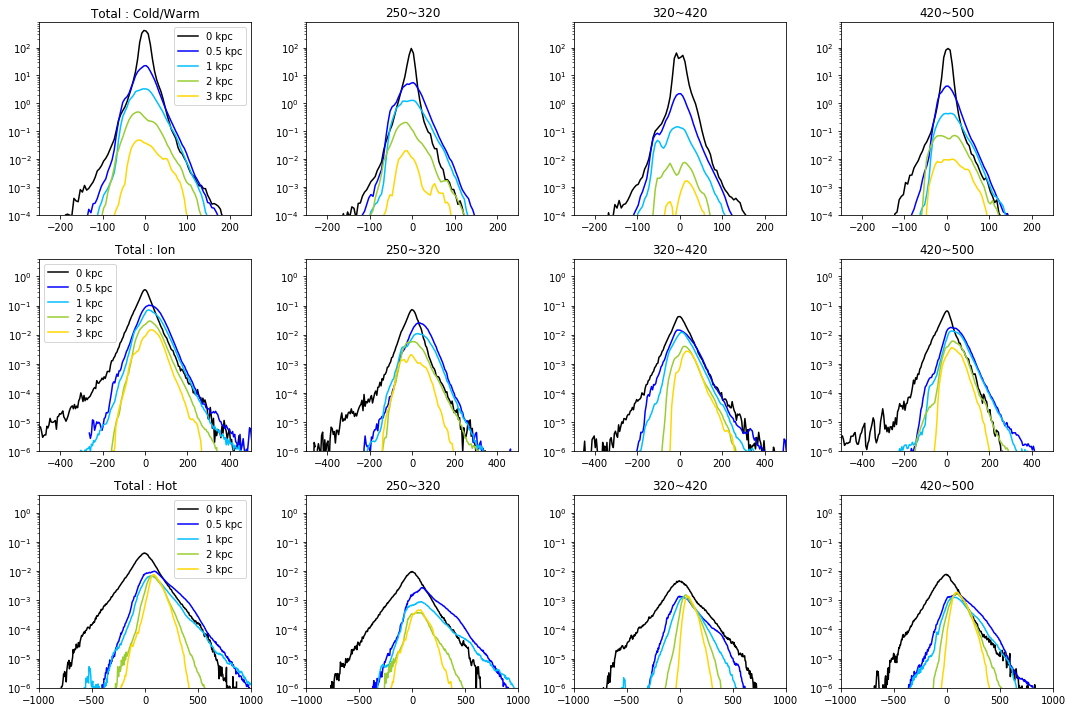

In [8]:
ct = np.mean(cold,axis=0)
c1 = np.mean(cold[0:70],axis=0)
c2 = np.mean(cold[70:170],axis=0)
c3 = np.mean(cold[170:-1],axis=0)
it = np.mean(ion,axis=0)
i1 = np.mean(ion[0:70],axis=0)
i2 = np.mean(ion[70:170],axis=0)
i3 = np.mean(ion[170:-1],axis=0)
ht = np.mean(hot,axis=0)
h1 = np.mean(hot[0:70],axis=0)
h2 = np.mean(hot[70:170],axis=0)
h3 = np.mean(hot[170:-1],axis=0)

xx = np.arange(-997.5,997.5,5)

plt.figure(figsize=(15,10))

C = ['k','blue','deepskyblue','yellowgreen','gold']
alpha = [1,1,1,1,1]
labell = ['0 kpc','0.5 kpc','1 kpc','2 kpc','3 kpc']
j = 0
for i in (448,510,573,698,823): # 0,0.5,1,2,3 kpc

    if k==0:
        coldt = np.sum(ct[i-3:i+3],axis=0)+np.sum(ct[896-i-3:896-i+3],axis=0)[::-1]
        cold1 = np.mean(c1[i-3:i+3],axis=0)+np.mean(c1[896-i-3:896-i+3],axis=0)[::-1]
        cold2 = np.mean(c2[i-3:i+3],axis=0)+np.mean(c2[896-i-3:896-i+3],axis=0)[::-1]
        cold3 = np.mean(c3[i-3:i+3],axis=0)+np.mean(c3[896-i-3:896-i+3],axis=0)[::-1]
        iont = np.sum(it[i-3:i+3],axis=0)+np.sum(it[896-i-3:896-i+3],axis=0)[::-1]
        ion1 = np.mean(i1[i-3:i+3],axis=0)+np.mean(i1[896-i-3:896-i+3],axis=0)[::-1]
        ion2 = np.mean(i2[i-3:i+3],axis=0)+np.mean(i2[896-i-3:896-i+3],axis=0)[::-1]
        ion3 = np.mean(i3[i-3:i+3],axis=0)+np.mean(i3[896-i-3:896-i+3],axis=0)[::-1]
        hott = np.sum(ht[i-3:i+3],axis=0)+np.sum(ht[896-i-3:896-i+3],axis=0)[::-1]
        hot1 = np.mean(h1[i-3:i+3],axis=0)+np.mean(h1[896-i-3:896-i+3],axis=0)[::-1]
        hot2 = np.mean(h2[i-3:i+3],axis=0)+np.mean(h2[896-i-3:896-i+3],axis=0)[::-1]
        hot3 = np.mean(h3[i-3:i+3],axis=0)+np.mean(h3[896-i-3:896-i+3],axis=0)[::-1]

    else:
        coldt = np.sum(ct[i-3:i+3],axis=0)
        cold1 = np.mean(c1[i-3:i+3],axis=0)
        cold2 = np.mean(c2[i-3:i+3],axis=0)
        cold3 = np.mean(c3[i-3:i+3],axis=0)
        iont = np.sum(it[i-3:i+3],axis=0)
        ion1 = np.mean(i1[i-3:i+3],axis=0)
        ion2 = np.mean(i2[i-3:i+3],axis=0)
        ion3 = np.mean(i3[i-3:i+3],axis=0)
        hott = np.sum(ht[i-3:i+3],axis=0)
        hot1 = np.mean(h1[i-3:i+3],axis=0)
        hot2 = np.mean(h2[i-3:i+3],axis=0)
        hot3 = np.mean(h3[i-3:i+3],axis=0)

    
    ######## Cold/Warm ##########
    
    plt.subplot(3,4,1)
    plt.semilogy(xx,coldt,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Cold/Warm')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.legend(loc=0)
    plt.xlim(-250,250)

    plt.subplot(3,4,2)
    plt.semilogy(xx,cold1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.xlim(-250,250)

    plt.subplot(3,4,3)
    plt.semilogy(xx,cold2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.xlim(-250,250)

    plt.subplot(3,4,4)
    plt.semilogy(xx,cold3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')

    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.xlim(-250,250)
    
    ############# Ion ############
    
    plt.subplot(3,4,5)
    plt.semilogy(xx,iont,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Ion')
    plt.ylim(1e-6,4)
    plt.legend(loc=0)
    plt.xlim(-500,500)

    plt.subplot(3,4,6)
    plt.semilogy(xx,ion1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    plt.ylim(1e-6,4)
    plt.xlim(-500,500)

    plt.subplot(3,4,7)
    plt.semilogy(xx,ion2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    plt.ylim(1e-6,4)
    plt.xlim(-500,500)

    plt.subplot(3,4,8)
    plt.semilogy(xx,ion3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')
    plt.ylim(1e-6,4)
    plt.xlim(-500,500)
    
    ########### Hot #############
    
    plt.subplot(3,4,9)
    plt.semilogy(xx,hott,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Hot')
    plt.ylim(1e-6,4)
    plt.legend(loc=0)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,10)
    plt.semilogy(xx,hot1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~320')
    plt.ylim(1e-6,4)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,11)
    plt.semilogy(xx,hot2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('320~420')
    plt.ylim(1e-6,4)
    plt.xlim(-1000,1000)

    plt.subplot(3,4,12)
    plt.semilogy(xx,hot3,label=labell[j],alpha=alpha[j],color=C[j])
    if k!=5:
        plt.title('420~500')
    else :
        plt.title('420-471')
    plt.ylim(1e-6,4)
    plt.xlim(-1000,1000)
    
    j = j+1
#plt.ylim(1e-5,2*1e2)
#plt.suptitle('ICM1')
#plt.legend(loc=0)
plt.tight_layout()
#label = 'ICM1'
#plt.savefig()
#plt.suptitle('0 kpc')
plt.savefig('D:/yeongu/plots/paperplot/velocity_new_%s.png' % label ,dpi=500)
plt.savefig('D:/yeongu/plots/paperplot/velocity_new_%s.eps' % label,format='eps',dpi=500)
plt.show()



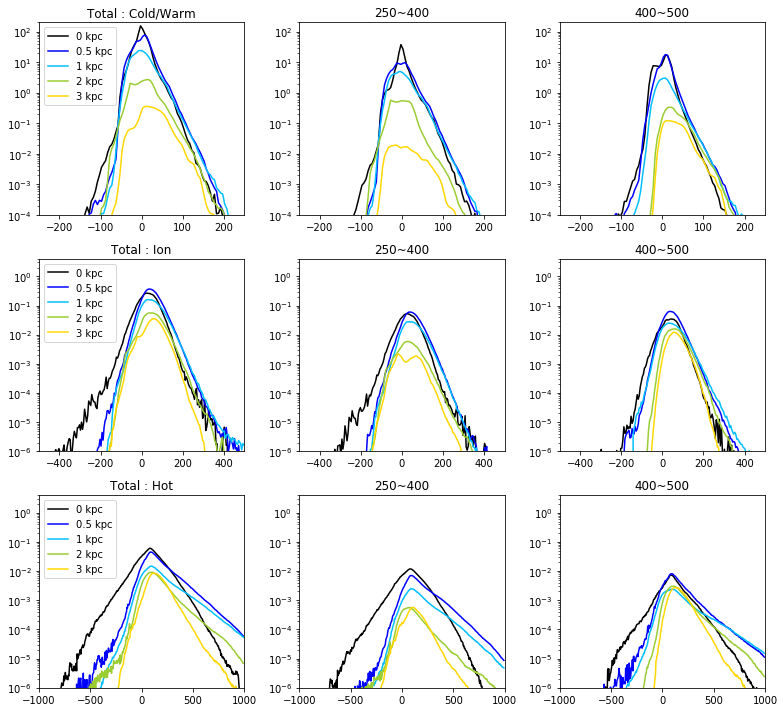

In [9]:
ct = np.mean(cold,axis=0)
c1 = np.mean(cold[0:150],axis=0)
c2 = np.mean(cold[150:-1],axis=0)
c3 = np.mean(cold[170:-1],axis=0)
it = np.mean(ion,axis=0)
i1 = np.mean(ion[0:150],axis=0)
i2 = np.mean(ion[150:-1],axis=0)
i3 = np.mean(ion[170:-1],axis=0)
ht = np.mean(hot,axis=0)
h1 = np.mean(hot[0:150],axis=0)
h2 = np.mean(hot[150:-1],axis=0)
h3 = np.mean(hot[170:-1],axis=0)

xx = np.arange(-997.5,997.5,5)

plt.figure(figsize=(11,10))

C = ['k','blue','deepskyblue','yellowgreen','gold']
alpha = [1,1,1,1,1]
labell = ['0 kpc','0.5 kpc','1 kpc','2 kpc','3 kpc']
j = 0
for i in (448,510,573,698,823): # 0,0.5,1,2,3 kpc

    if k==0:
        coldt = np.sum(ct[i-3:i+3],axis=0)+np.sum(ct[896-i-3:896-i+3],axis=0)[::-1]
        cold1 = np.mean(c1[i-3:i+3],axis=0)+np.mean(c1[896-i-3:896-i+3],axis=0)[::-1]
        cold2 = np.mean(c2[i-3:i+3],axis=0)+np.mean(c2[896-i-3:896-i+3],axis=0)[::-1]
        cold3 = np.mean(c3[i-3:i+3],axis=0)+np.mean(c3[896-i-3:896-i+3],axis=0)[::-1]
        iont = np.sum(it[i-3:i+3],axis=0)+np.sum(it[896-i-3:896-i+3],axis=0)[::-1]
        ion1 = np.mean(i1[i-3:i+3],axis=0)+np.mean(i1[896-i-3:896-i+3],axis=0)[::-1]
        ion2 = np.mean(i2[i-3:i+3],axis=0)+np.mean(i2[896-i-3:896-i+3],axis=0)[::-1]
        ion3 = np.mean(i3[i-3:i+3],axis=0)+np.mean(i3[896-i-3:896-i+3],axis=0)[::-1]
        hott = np.sum(ht[i-3:i+3],axis=0)+np.sum(ht[896-i-3:896-i+3],axis=0)[::-1]
        hot1 = np.mean(h1[i-3:i+3],axis=0)+np.mean(h1[896-i-3:896-i+3],axis=0)[::-1]
        hot2 = np.mean(h2[i-3:i+3],axis=0)+np.mean(h2[896-i-3:896-i+3],axis=0)[::-1]
        hot3 = np.mean(h3[i-3:i+3],axis=0)+np.mean(h3[896-i-3:896-i+3],axis=0)[::-1]

    else:
        coldt = np.sum(ct[i-3:i+3],axis=0)
        cold1 = np.mean(c1[i-3:i+3],axis=0)
        cold2 = np.mean(c2[i-3:i+3],axis=0)
        cold3 = np.mean(c3[i-3:i+3],axis=0)
        iont = np.sum(it[i-3:i+3],axis=0)
        ion1 = np.mean(i1[i-3:i+3],axis=0)
        ion2 = np.mean(i2[i-3:i+3],axis=0)
        ion3 = np.mean(i3[i-3:i+3],axis=0)
        hott = np.sum(ht[i-3:i+3],axis=0)
        hot1 = np.mean(h1[i-3:i+3],axis=0)
        hot2 = np.mean(h2[i-3:i+3],axis=0)
        hot3 = np.mean(h3[i-3:i+3],axis=0)

    
    ######## Cold/Warm ##########
    
    plt.subplot(3,3,1)
    plt.semilogy(xx,coldt,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Cold/Warm')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.legend(loc=0)
    plt.xlim(-250,250)

    plt.subplot(3,3,2)
    plt.semilogy(xx,cold1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~400')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.xlim(-250,250)

    plt.subplot(3,3,3)
    plt.semilogy(xx,cold2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('400~500')
    if k==0 or k==1 or k==2 :
        plt.ylim(1e-4,8*1e2)
    else:
        plt.ylim(1e-4,2*1e2)
    plt.xlim(-250,250)
    
    ############# Ion ############
    
    plt.subplot(3,3,4)
    plt.semilogy(xx,iont,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Ion')
    plt.ylim(1e-6,4)
    plt.legend(loc=0)
    plt.xlim(-500,500)

    plt.subplot(3,3,5)
    plt.semilogy(xx,ion1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~400')
    plt.ylim(1e-6,4)
    plt.xlim(-500,500)

    plt.subplot(3,3,6)
    plt.semilogy(xx,ion2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('400~500')
    plt.ylim(1e-6,4)
    plt.xlim(-500,500)

    ########### Hot #############
    
    plt.subplot(3,3,7)
    plt.semilogy(xx,hott,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('Total : Hot')
    plt.ylim(1e-6,4)
    plt.legend(loc=0)
    plt.xlim(-1000,1000)

    plt.subplot(3,3,8)
    plt.semilogy(xx,hot1,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('250~400')
    plt.ylim(1e-6,4)
    plt.xlim(-1000,1000)

    plt.subplot(3,3,9)
    plt.semilogy(xx,hot2,label=labell[j],alpha=alpha[j],color=C[j])
    plt.title('400~500')
    plt.ylim(1e-6,4)
    plt.xlim(-1000,1000)

    j = j+1
#plt.ylim(1e-5,2*1e2)
#plt.suptitle('ICM1')
#plt.legend(loc=0)
plt.tight_layout()
#label = 'ICM1'
#plt.savefig()
#plt.suptitle('0 kpc')
#plt.savefig('D:/yeongu/plots/paperplot/velocity_new_%s.png' % label ,dpi=500)
#plt.savefig('D:/yeongu/plots/paperplot/velocity_new_%s.eps' % label,format='eps',dpi=500)
plt.show()



In [23]:
labell = (r'No ICM','ICM00','ICM0','ICM1','ICM2','ICM3','ICM4') # 'NonICM',r'No ICM',
labelll = ('Total','Cold&Warm','Hot')

cold_no = cPickle.load(open('surf_ism_cold_No ICM.pkl','rb'))
ion_no = cPickle.load(open('surf_ism_ion_No ICM.pkl','rb'))
hot_no = cPickle.load(open('surf_ism_hot_No ICM.pkl','rb'))

cold_1 = cPickle.load(open('surf_ism_cold_ICM1.pkl','rb'))
ion_1 = cPickle.load(open('surf_ism_ion_ICM1.pkl','rb'))
hot_1 = cPickle.load(open('surf_ism_hot_ICM1.pkl','rb'))

cold_2 = cPickle.load(open('surf_ism_cold_ICM2.pkl','rb'))
ion_2 = cPickle.load(open('surf_ism_ion_ICM2.pkl','rb'))
hot_2 = cPickle.load(open('surf_ism_hot_ICM2.pkl','rb'))

label = labell[k]
print cold.shape # tiem / ([hist0,hist0_c,hist0_h,histh,histh_c,histh_h,hist1,hist1_c,hist1_h,hist2,hist2_c,hist2_h,hist3,hist3_c,hist3_h]) # -1000,1000,5

(250L, 896L, 399L)


In [ ]:
##### height overlap #########

ct = np.mean(cold_no,axis=0)
c1 = np.mean(cold_no[0:70],axis=0)
c2 = np.mean(cold_no[70:170],axis=0)
c3 = np.mean(cold_no[170:-1],axis=0)
it = np.mean(ion_no,axis=0)
i1 = np.mean(ion_no[0:70],axis=0)
i2 = np.mean(ion_no[70:170],axis=0)
i3 = np.mean(ion_no[170:-1],axis=0)
ht = np.mean(hot_no,axis=0)
h1 = np.mean(hot_no[0:70],axis=0)
h2 = np.mean(hot_no[70:170],axis=0)
h3 = np.mean(hot_no[170:-1],axis=0)

ct_1 = np.mean(cold_1,axis=0)
c1_1 = np.mean(cold_1[0:70],axis=0)
c2_1 = np.mean(cold_1[70:170],axis=0)
c3_1 = np.mean(cold_1[170:-1],axis=0)
it_1 = np.mean(ion_1,axis=0)
i1_1 = np.mean(ion_1[0:70],axis=0)
i2_1 = np.mean(ion_1[70:170],axis=0)
i3_1 = np.mean(ion_1[170:-1],axis=0)
ht_1 = np.mean(hot_1,axis=0)
h1_1 = np.mean(hot_1[0:70],axis=0)
h2_1 = np.mean(hot_1[70:170],axis=0)
h3_1 = np.mean(hot_1[170:-1],axis=0)

ct_2 = np.mean(cold_2,axis=0)
c1_2 = np.mean(cold_2[0:70],axis=0)
c2_2 = np.mean(cold_2[70:170],axis=0)
c3_2 = np.mean(cold_2[170:-1],axis=0)
it_2 = np.mean(ion_2,axis=0)
i1_2 = np.mean(ion_2[0:70],axis=0)
i2_2 = np.mean(ion_2[70:170],axis=0)
i3_2 = np.mean(ion_2[170:-1],axis=0)
ht_2 = np.mean(hot_2,axis=0)
h1_2 = np.mean(hot_2[0:70],axis=0)
h2_2 = np.mean(hot_2[70:170],axis=0)
h3_2 = np.mean(hot_2[170:-1],axis=0)

xx = np.arange(-997.5,997.5,5)
#print len(xx)

plt.figure(figsize=(15,7))


C = ['k','navy','blue','deepskyblue','skyblue']
alpha = [1,0.8,0.7,1,1]
labell = ['0 kpc','0.5 kpc','1 kpc','2 kpc','3 kpc']
j = 0
#for i in (448,510,573,698,823): # 0,0.5,1,2,3 kpc
i = 448   
coldt = np.sum(ct[i-3:i+3],axis=0)+np.sum(ct[896-i-3:896-i+3],axis=0)[::-1]
cold1 = np.mean(c1[i-3:i+3],axis=0)+np.mean(c1[896-i-3:896-i+3],axis=0)[::-1]
cold2 = np.mean(c2[i-3:i+3],axis=0)+np.mean(c2[896-i-3:896-i+3],axis=0)[::-1]
cold3 = np.mean(c3[i-3:i+3],axis=0)+np.mean(c3[896-i-3:896-i+3],axis=0)[::-1]
iont = np.sum(it[i-3:i+3],axis=0)+np.sum(it[896-i-3:896-i+3],axis=0)[::-1]
ion1 = np.mean(i1[i-3:i+3],axis=0)+np.mean(i1[896-i-3:896-i+3],axis=0)[::-1]
ion2 = np.mean(i2[i-3:i+3],axis=0)+np.mean(i2[896-i-3:896-i+3],axis=0)[::-1]
ion3 = np.mean(i3[i-3:i+3],axis=0)+np.mean(i3[896-i-3:896-i+3],axis=0)[::-1]
hott = np.sum(ht[i-3:i+3],axis=0)+np.sum(ht[896-i-3:896-i+3],axis=0)[::-1]
hot1 = np.mean(h1[i-3:i+3],axis=0)+np.mean(h1[896-i-3:896-i+3],axis=0)[::-1]
hot2 = np.mean(h2[i-3:i+3],axis=0)+np.mean(h2[896-i-3:896-i+3],axis=0)[::-1]
hot3 = np.mean(h3[i-3:i+3],axis=0)+np.mean(h3[896-i-3:896-i+3],axis=0)[::-1]
        
#### ICM 1 ####        
coldt_1 = np.sum(ct_1[i-3:i+3],axis=0)
cold1_1 = np.mean(c1_1[i-3:i+3],axis=0)
cold2_1 = np.mean(c2_1[i-3:i+3],axis=0)
cold3_1 = np.mean(c3_1[i-3:i+3],axis=0)
iont_1 = np.sum(it_1[i-3:i+3],axis=0)
ion1_1 = np.mean(i1_1[i-3:i+3],axis=0)
ion2_1 = np.mean(i2_1[i-3:i+3],axis=0)
ion3_1 = np.mean(i3_1[i-3:i+3],axis=0)
hott_1 = np.sum(ht_1[i-3:i+3],axis=0)
hot1_1 = np.mean(h1_1[i-3:i+3],axis=0)
hot2_1 = np.mean(h2_1[i-3:i+3],axis=0)
hot3_1 = np.mean(h3_1[i-3:i+3],axis=0)

#### ICM 2 #####
coldt_2 = np.sum(ct_2[i-3:i+3],axis=0)
cold1_2 = np.mean(c1_2[i-3:i+3],axis=0)
cold2_2 = np.mean(c2_2[i-3:i+3],axis=0)
cold3_2 = np.mean(c3_2[i-3:i+3],axis=0)
iont_2 = np.sum(it_2[i-3:i+3],axis=0)
ion1_2 = np.mean(i1_2[i-3:i+3],axis=0)
ion2_2 = np.mean(i2_2[i-3:i+3],axis=0)
ion3_2 = np.mean(i3_2[i-3:i+3],axis=0)
hott_2 = np.sum(ht_2[i-3:i+3],axis=0)
hot1_2 = np.mean(h1_2[i-3:i+3],axis=0)
hot2_2 = np.mean(h2_2[i-3:i+3],axis=0)
hot3_2 = np.mean(h3_2[i-3:i+3],axis=0)

plt.close()
plt.figure(figsize=(15,7))
plt.subplot(2,4,1)
plt.semilogy(xx,coldt,label='No ICM')
plt.semilogy(xx,coldt_1,label='ICM1')
plt.semilogy(xx,coldt_2,label='ICM2')
plt.title('Total : Cold/Warm')
#if k==0 or k==1 or k==2 :
plt.ylim(1e-5,8*1e2)
#else:
#    plt.ylim(1e-5,2*1e2)
plt.legend(loc=0)
plt.xlim(-250,250)
    
plt.subplot(2,4,2)
plt.semilogy(xx,cold1,label='No ICM')
plt.semilogy(xx,cold1_1,label='ICM1')
plt.semilogy(xx,cold1_2,label='ICM2')
plt.title('250~320')
#if k==0 or k==1 or k==2 :
plt.ylim(1e-5,8*1e2)
#else:
#    plt.ylim(1e-5,2*1e2)
plt.xlim(-250,250)
    
plt.subplot(2,4,3)
plt.semilogy(xx,cold2,label='No ICM')
plt.semilogy(xx,cold2_1,label='ICM1')
plt.semilogy(xx,cold2_2,label='ICM2')
plt.title('320~420')
#if k==0 or k==1 or k==2 :
plt.ylim(1e-5,8*1e2)
#else:
#    plt.ylim(1e-5,2*1e2)
plt.xlim(-250,250)
    
plt.subplot(2,4,4)
plt.semilogy(xx,cold3,label='No ICM')
plt.semilogy(xx,cold3_1,label='ICM1')
plt.semilogy(xx,cold3_2,label='ICM2')
#if k!=5:
plt.title('420~500')
#else :
#    plt.title('420-471')
    
#if k==0 or k==1 or k==2 :
plt.ylim(1e-5,8*1e2)
#else:
#    plt.ylim(1e-5,2*1e2)
plt.xlim(-250,250)
    
plt.subplot(2,4,5)
plt.semilogy(xx,hott,label='No ICM')
plt.semilogy(xx,hott_1,label='ICM1')
plt.semilogy(xx,hott_2,label='ICM2')
plt.title('Total : Hot')
plt.ylim(1e-7,1e1)
plt.legend(loc=0)
    
plt.subplot(2,4,6)
plt.semilogy(xx,hot1,label='No ICM')
plt.semilogy(xx,hot1_1,label='ICM1')
plt.semilogy(xx,hot1_2,label='ICM2')
plt.title('250~320')
plt.ylim(1e-7,1e1)

plt.subplot(2,4,7)
plt.semilogy(xx,hot2,label='No ICM')
plt.semilogy(xx,hot2_1,label='ICM1')
plt.semilogy(xx,hot2_2,label='ICM2')
plt.title('320~420')
plt.ylim(1e-7,1e1)
    
plt.subplot(2,4,8)
plt.semilogy(xx,hot3,label='No ICM')
plt.semilogy(xx,hot3_1,label='ICM1')
plt.semilogy(xx,hot3_2,label='ICM2')
#if k!=5:
plt.title('420~500')
#else :
#    plt.title('420-471')
plt.ylim(1e-7,1e1)
    
    #j = j+1
#plt.ylim(1e-5,2*1e2)
#plt.suptitle('ICM1')
plt.legend(loc=0)
plt.tight_layout()
#label = 'ICM1'
#plt.savefig()
plt.suptitle('0 kpc')
plt.savefig('velocity_0kpc.png' ,dpi=500)
plt.show()